<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

***

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
# Скачайте файл dst-3.0_16_1_hh_database.zip по адресу
# https://drive.google.com/file/d/17QR0VnxYIPkdoNnlrIlvjmuGXTdbrhgS/view?usp=sharing
# и распакуйте архив

# Сначала подумал, что нужно подгрузить датасет с гугл-диска, поэтому исследовал,
# как загрузить (гугл и дипсик, чат август 2025):

# 1. ====================== ZIP-АРХИВ ЛОКАЛЬНО =============================
# import pandas as pd
# import zipfile

# with zipfile.ZipFile('dst-3.0_16_1_hh_database.zip', 'r') as zip_ref:
#     # Укажите только нужные колонки и правильные типы данных
#     df = pd.read_csv(
#         zip_ref.open('dst-3.0_16_1_hh_database.csv'), sep = ';'
#     )
#     display(df.head(3))

# 2. =============== ZIP-АРХИВ С GOOGLE DRIVE ===============================

# # Чтобы установить модуль в Anaconda, откройте Anaconda Prompt и запустите команду
# # conda install имя_модуля

# # У меня такого модуля не оказалось, поэтому идем на на https://anaconda.org/
# # вводим имя модуля и ищем подходящее, я нашел https://anaconda.org/conda-forge/gdown
# # noarch в имени пакета значит, что подходит для всех архитектур
# # устанавливаем так:
# # conda install conda-forge::gdown

# # Документация на пакет https://github.com/wkentaro/gdown:

# # import gdown

# # # a file
# # url = "https://drive.google.com/uc?id=1l_5RK28JRL19wpT22B-DY9We3TVXnnQQ"
# # output = "fcn8s_from_caffe.npz"
# # gdown.download(url, output)

# # # same as the above, but with the file ID
# # id = "0B9P1L--7Wd2vNm9zMTJWOGxobkU"
# # gdown.download(id=id, output=output)

# # # same as the above, and you can copy-and-paste a URL from Google Drive with fuzzy=True
# # url = "https://drive.google.com/file/d/0B9P1L--7Wd2vNm9zMTJWOGxobkU/view?usp=sharing"
# # gdown.download(url=url, output=output, fuzzy=True)

# # # Cached download with identity check via MD5 (or SHA1, SHA256, etc).
# # # Pass postprocess function e.g., extracting compressed file.
# # md5 = "md5:fa837a88f0c40c513d975104edf3da17"
# # gdown.cached_download(url, output, hash=hash, postprocess=gdown.extractall)

# # # a folder
# # url = "https://drive.google.com/drive/folders/15uNXeRBIhVvZJIhL4yTw4IsStMhUaaxl"
# # gdown.download_folder(url)

# # # same as the above, but with the folder ID
# # id = "15uNXeRBIhVvZJIhL4yTw4IsStMhUaaxl"
# # gdown.download_folder(id=id)

# # ========================= ОТСЮДА МОЙ КОД ===============================
# import gdown
# import zipfile

# # URL вашего файла (замените на ваш)

# # сама ссылка на расшаренный файл (гугл диск - Colab Notebooks - Конспект DS-3 - Project-1_hh.ru_backup_2025.08.22
# # https://drive.google.com/file/d/17QR0VnxYIPkdoNnlrIlvjmuGXTdbrhgS/view?usp=sharing

# file_id = "17QR0VnxYIPkdoNnlrIlvjmuGXTdbrhgS"  # Из URL: https://drive.google.com/file/d/ФАЙЛ_ID/view
# url = f"https://drive.google.com/uc?id={file_id}"

# # Скачиваем файл
# output = "dst-3.0_16_1_hh_database.zip"
# gdown.download(url, output, fuzzy=True) # fuzzy=True - позволяет работать с разными форматами ссылок Google Диска
                                          # quiet=False - показывает или нет прогресс загрузки

# # Распаковываем и читаем
# with zipfile.ZipFile(output, 'r') as zip_ref:
#     # Укажите только нужные колонки и правильные типы данных
#     df = pd.read_csv(
#         zip_ref.open('dst-3.0_16_1_hh_database.csv'), sep = ';'
#     )
#     display(df.head(3))

# # для обыкновенного открытия делаем обыкновенно

df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep = ';')
print(f'Размерность таблицы: {df.shape[0]} строк, {df.shape[1]} столбцов')

Размерность таблицы: 44744 строк, 12 столбцов


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
print('\n=========================== НАЧАЛО ТАБЛИЦЫ ===========================\n')
display(df.head(2))
print('\n=========================== КОНЕЦ ТАБЛИЦЫ ============================\n')
display(df.tail(2))
print('\n================== ДВА СЛУЧАЙНЫХ ЗНАЧЕНИЯ ТАБЛИЦЫ ===================\n')
display(df.sample(2))


=========================== НАЧАЛО ТАБЛИЦЫ ===========================



Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано


=========================== КОНЕЦ ТАБЛИЦЫ ============================



Пол, возраст           ЗП  \
44742  Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743   Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

      Ищет работу на должность:  \
44742          Контент-менеджер   
44743      Руководитель проекта   

                            Город, переезд, командировки  \
44742  Тамбов , не готов к переезду , не готов к кома...   
44743  Москва , не готов к переезду , не готов к кома...   

                                   Занятость            График  \
44742  частичная занятость, полная занятость  удаленная работа   
44743                       полная занятость       полный день   

                                             Опыт работы  \
44742  Опыт работы 3 года 10 месяцев  Контент-менедже...   
44743  Опыт работы 15 лет 10 месяцев  Руководитель пр...   

      Последнее/нынешнее место работы  \
44742                       IQ-Maxima   
44743               ПАО ГК ТНС энерго   

                    Последняя/нынешняя должность  \
44742                          Менеджер проектов   
44743  Руководитель отдела технической поддержки   

                                       Образование и ВУЗ Обновление резюме  \
44742  Высшее образование 2015  Тамбовский государств...  26.04.2019 14:25   
44743  Высшее образование 1997  Южно-Российский госуд...  05.07.2018 20:15   

                                 Авто  
44742  Имеется собственный автомобиль  
44743                      Не указано


================== ДВА СЛУЧАЙНЫХ ЗНАЧЕНИЯ ТАБЛИЦЫ ===================



Пол, возраст          ЗП  \
3459   Мужчина ,  20 лет , родился 27 сентября 1998  45000 руб.   
25819    Мужчина ,  22 года , родился 24 марта 1997  80000 руб.   

           Ищет работу на должность:  \
3459   Ведущий специалист (менеджер)   
25819           Руководитель проекта   

                            Город, переезд, командировки         Занятость  \
3459   Нижний Новгород ,  м. Заречная , не готов к пе...  полная занятость   
25819  Санкт-Петербург , не готов к переезду , готов ...  полная занятость   

            График                                        Опыт работы  \
3459   полный день  Опыт работы 1 год 6 месяцев  Ведущий специалис...   
25819  полный день  Опыт работы 2 года 5 месяцев  Руководитель про...   

              Последнее/нынешнее место работы  \
3459   Центральный филиал АО "МегаФон Ритейл"   
25819                 ЭР-Телеком Холдинг, ЗАО   

               Последняя/нынешняя должность  \
3459   Менеджер офиса продаж и обслуживания   
25819              Территориальный менеджер   

                                       Образование и ВУЗ Обновление резюме  \
3459   Неоконченное высшее образование 2023  Нижегоро...  25.04.2019 11:48   
25819  Неоконченное высшее образование 2019  Санкт-Пе...  26.04.2019 14:35   

             Авто  
3459   Не указано  
25819  Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
print('\n=========================== INFO() ============================\n')
display(df.info())


=========================== INFO() ============================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                       

None

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
# вычислим процент пустых значений
df_null = df.isnull().mean() * 100 # Это таблица по проценту пустых значений во всех колонках
cols_with_null = df_null[df_null>0].sort_values(ascending=False) # отбираем, где больше нуля и сортируем

print(cols_with_null)

Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64


5. Выведите основную статистическую информацию о столбцах.


In [6]:
print('\n=========================== DESCRIBE ============================\n')
display(df.describe(include = 'all'))


=========================== DESCRIBE ============================



Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 2014 Тюменский Государствен...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

***

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
# Про использование совета про заглавную первую букву
# придумал только так
#def find_education3(x):
#    if x.find('В') == 0:
#        return 'высшее'
#    elif x.find('Н') == 0:
#        return 'неоконченное высшее'
#    elif x.find('С') == 0 and x.find('с') == 8:
#        return 'среднее специальное'
#    else:
#        return 'среднее'
        
#df['Образование3'] = df['Образование и ВУЗ'].apply(find_education3)

# а я сделал сначала так
#df['Образование'] = df['Образование и ВУЗ'].apply(lambda x: ' '.join(x.split()[:2]))
#df['Образование'] = df['Образование'].apply(lambda x: x.replace('Высшее образование', 'Высшее'))
#df['Образование'] = df['Образование'].apply(lambda x: x.replace('Среднее образование', 'Среднее'))
#df['Образование'] = df['Образование'].apply(lambda x: x.lower())

# потом все поместил в функцию
def find_education(x):
    stroka = ' '.join(x.split()[:2])                           # оставляем первые два слова
    stroka = stroka.replace('Высшее образование', 'Высшее')    # меняем
    stroka = stroka.replace('Среднее образование', 'Среднее')  # меняем
    stroka = stroka.lower()                                    # все делаем с прописной
    return stroka

df['Образование'] = df['Образование и ВУЗ'].apply(find_education)

df = df.drop(["Образование и ВУЗ"], axis=1)

print(f'\nКатегории образования: {", ".join(df['Образование'].unique())}') # Примечание: display не понимает \n

# Задание 3.1
# Сколько соискателей имеет средний уровень образования (школьное образование)?

education_mean_count = df[df['Образование'] == 'среднее']['Образование'].count()

print(f'\nКоличество людей со средним образованием - {education_mean_count}')


Категории образования: неоконченное высшее, высшее, среднее специальное, среднее

Количество людей со средним образованием - 559


***

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
# Признак Пол, тут легко, оставляем первую букву
df['Пол'] = df['Пол, возраст'].apply(lambda x: x[:1])

# Признак Возраст, тут делим по запятой, берем второй член деления (напр. 21 год), сплитуем, берем первый член деления
df['Возраст'] = df['Пол, возраст'].apply(lambda x: x.split(',')[1].split()[0])
df = df.drop(['Пол, возраст'], axis=1)

# смотрим, что получилось
display(df.sample(5))

# Задание 3.2
# Сколько процентов женских резюме
# количество можно получить например так
# df.query('Пол == "Ж"')['Пол'].count()
# или так
# df['Пол'].value_counts().loc['Ж']
# без .loc['Ж'] получается таблица, где и М и Ж

pers_woman = round(df['Пол'].value_counts(normalize=True)*100, 2).loc['Ж']
print(f'\nПроцент женских резюме {pers_woman}%')

# средний возраст соискателей, преобразуем в int
df['Возраст'] = df['Возраст'].astype(int)
age_mean = round(df['Возраст'].mean(), 1) # здесь округляем прямо в расчете

print(f'\nСредний возраст соискателей {age_mean} года')

ЗП Ищет работу на должность:  \
38824  25000 руб.     Начинающий специалист   
15573  40000 руб.                   Инженер   
38118  50000 руб.   Системный администратор   
18584  45000 руб.   Системный администратор   
15757     50 руб.                  Аналитик   

                            Город, переезд, командировки  \
38824  Сасово , не готова к переезду , не готова к ко...   
15573  Ростов-на-Дону , не готов к переезду , готов к...   
38118  Екатеринбург , не готов к переезду , готов к к...   
18584  Москва , не готов к переезду , готов к редким ...   
15757  Владивосток , не готова к переезду , не готова...   

                                   Занятость  \
38824                       полная занятость   
15573  частичная занятость, полная занятость   
38118                       полная занятость   
18584                       полная занятость   
15757                       полная занятость   

                                                  График  \
38824         гибкий график, полный день, сменный график   
15573  гибкий график, полный день, сменный график, уд...   
38118  гибкий график, полный день, сменный график, ва...   
18584                                        полный день   
15757                                        полный день   

                                             Опыт работы  \
38824  Опыт работы 1 год 6 месяцев  Начинающий специа...   
15573  Опыт работы 9 лет 10 месяцев  Август 2017 — по...   
38118  Опыт работы 11 лет 4 месяца  Системный админис...   
18584  Опыт работы 5 лет 10 месяцев  Декабрь 2016 — п...   
15757  Опыт работы 5 лет  Аналитик 50 руб. Информацио...   

      Последнее/нынешнее место работы  \
38824                        Сбербанк   
15573                      ВоздухПроф   
38118  МБУ "Электронный Екатеринбург"   
18584     Радуга Кино – Нагатино, ООО   
15757                     АО «Винлаб»   

                            Последняя/нынешняя должность Обновление резюме  \
38824                Консультант по банковским продуктам  22.04.2019 10:18   
15573                              Инженер по вентиляции  11.04.2019 13:32   
38118  главный специалист отдела технического сопрово...  25.04.2019 08:30   
18584                                           Электрик  14.04.2019 20:36   
15757                              категорийный менеджер  26.04.2019 10:10   

                                 Авто          Образование Пол Возраст  
38824                      Не указано  среднее специальное   Ж      23  
15573  Имеется собственный автомобиль  среднее специальное   М      30  
38118                      Не указано               высшее   М      30  
18584                      Не указано               высшее   М      28  
15757                      Не указано               высшее   Ж      26


Процент женских резюме 19.07%

Средний возраст соискателей 32.2 года


***

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
# Признак "Опыт работы" - количество месяцев
# доработаем функцию для подсчета месяцев из лекций
def get_experience(arg):
    # если встретили NaN - его и возвращаем
    if arg in ['NaN', 'nan', 'naN', 'Nan', np.nan] or arg == 'Не указано': # Не указано - такого нет
        return np.nan                                                       # осталось загадкой, откуда взялся np.nan
    else:
        # отделяем само описание опыта работы
        arg = arg.split('  ')[0] # разделитель НЕ запятая, а два пробела
        # используем функцию из лекции
        month_key_words = ['месяц', 'месяцев', 'месяца']
        year_key_words = ['год', 'лет', 'года']
        args_splited = arg.split(' ')
        month = 0
        year = 0
        for i in range(len(args_splited)):
            if args_splited[i] in month_key_words:
                month = args_splited[i-1]
            if args_splited[i] in year_key_words:
                year = args_splited[i-1]
        return int(year)*12 + int(month)

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience)

df = df.drop(['Опыт работы'], axis=1)

# смотрим, что получилось
display(df.sample(5))

# Задание 3.3
# медианный опыт работы, тут уже в int
median_exp = df['Опыт работы (месяц)'].median()

print(f'\nМедианный опыт работы {median_exp:.0f} месяцев') # после median число 100.0, а так убрали вывод этого нуля

ЗП       Ищет работу на должность:  \
23001   50000 руб.                     Программист   
1264   120000 руб.             Инженер-разработчик   
40587  120000 руб.  Junior девелопер Vue / ReactJS   
33761   94000 руб.              Программист Delphi   
18965   45000 руб.                Специалист по IT   

                            Город, переезд, командировки  \
23001  Москва ,  м. Бульвар Дмитрия Донского , не гот...   
1264   Санкт-Петербург ,  м. Владимирская , готов к п...   
40587  Москва ,  м. Комсомольская , не готов к переез...   
33761  Москва , не готов к переезду , не готов к кома...   
18965    Омск , готов к переезду , готов к командировкам   

                                               Занятость  \
23001                                   полная занятость   
1264   стажировка, частичная занятость, полная занятость   
40587                                   полная занятость   
33761                                   полная занятость   
18965                                   полная занятость   

                                                  График  \
23001                                        полный день   
1264   гибкий график, полный день, сменный график, уд...   
40587                                        полный день   
33761                                        полный день   
18965  гибкий график, полный день, сменный график, уд...   

      Последнее/нынешнее место работы   Последняя/нынешняя должность  \
23001                  ТК Савеловский  Механик-наладчик оборудования   
1264           Elmos Semiconductor AG            Validation Engineer   
40587                        IT-Сфера                Программист PHP   
33761                      АО Автодом            Ведущий программист   
18965             Альфа-Банк (Россия)                     Инженер IT   

      Обновление резюме                            Авто          Образование  \
23001  22.04.2019 16:49  Имеется собственный автомобиль  среднее специальное   
1264   16.04.2019 20:02                      Не указано               высшее   
40587  25.04.2019 13:10                      Не указано              среднее   
33761  20.04.2019 13:40                      Не указано               высшее   
18965  14.04.2019 13:01                      Не указано               высшее   

      Пол  Возраст  Опыт работы (месяц)  
23001   М       19                 44.0  
1264    М       27                 88.0  
40587   М       35                160.0  
33761   М       58                259.0  
18965   М       29                 93.0


Медианный опыт работы 100 месяцев


***

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:
# Признак "Город"
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']

def find_city(x):
    if x.split()[0] == 'Москва':             # если первое Москва
        return 'Москва'
    elif x.split()[0] == 'Санкт-Петербург':  # если первое СП
        return 'Санкт-Петербург'
    elif x.split()[0] in million_cities:     # если один из миллионников
        return 'город-миллионник'
    else:                                    # если какой-то другой город или страна
        return 'другие'

# Признак "Готовность к переезду"
# тут просто ищем части слов готов, готова , хочу
def find_pereezd(x):
    if ', готов к пе' in x or ', хочу пе' in x or ', готова к пе' in x:
        return True
    else:
        return False

# Признак "Готовность к командировкам"
# так же ищем части слов готов, готова
# !!!!!!
# также мой код находит строки 5055, 14929, 21688 вида:

# 'Минск ,  м. Спортивная , готов к переезду (Москва, Санкт-Петербург, Нижний Новгород,
# Екатеринбург, Уфа, Новосибирск, Омск, Пермь, Челябинск, Гомель, Ростов-на-Дону,
# Витебск, Самара, Гродно, Брест, Красноярск, Волгоград, Казань, Воронеж) , готов к командир'

# а код с платформы сначала ищет слово "командировка", а в этих строках оно обрезано и строки пропускаются,
# на результат не влияет, но все же мой код более точно ищет;)

def find_komandirovka(x):
    if ', готов к ко' in x or ', готова к ко' in x or ', готов к редким ко' in x or ', готова к редким ко' in x:
        return True
    else:
        return False

df['Город'] = df['Город, переезд, командировки'].apply(find_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(find_pereezd)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(find_komandirovka)

df = df.drop(["Город, переезд, командировки"], axis=1)

# смотрим, что получилось
display(df.head())

# display(df[['Город, переезд, командировки', 'Город', 'Готовность к переезду', 'Готовность к командировкам']].sample(20))

# Задание 3.4
# Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.

pers_SP = (df['Город'].value_counts(normalize=True)).loc['Санкт-Петербург'] # тут не стали умножать на 100

print(f'\nПроцент соискателей из Санкт-Петербурга - {pers_SP:.0%}') # можно тут округлить до нуля

# Процент соискателей, которые готовы одновременно и к переездам, и к командировкам
mask1 = df['Готовность к переезду'] == True
mask2 = df['Готовность к командировкам'] == True

pers_pereezd_komand = df[mask1 & mask2].shape[0]/df.shape[0]

print(f'\nПроцент соискателей, которые готовы одновременно и к переездам, и к командировкам - {pers_pereezd_komand:.0%}')

ЗП                          Ищет работу на должность:  \
0   29000 руб.                            Системный администратор   
1   40000 руб.                               Технический писатель   
2   20000 руб.                                           Оператор   
3  100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4  140000 руб.                  Региональный менеджер по продажам   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                               Кассир-операционист  16.04.2019 08:35   
3                               Инженер-программист  08.04.2019 14:23   
4                              Менеджер по продажам  22.04.2019 10:32   

                             Авто          Образование Пол  Возраст  \
0  Имеется собственный автомобиль  неоконченное высшее   М       39   
1                      Не указано               высшее   М       60   
2                      Не указано  среднее специальное   Ж       36   
3                      Не указано               высшее   М       38   
4                      Не указано               высшее   Ж       26   

   Опыт работы (месяц)   Город  Готовность к переезду  \
0                202.0  другие                  False   
1                233.0  другие                  False   
2                123.0  другие                  False   
3                225.0  другие                  False   
4                 67.0  Москва                  False   

   Готовность к командировкам  
0                       False  
1                        True  
2                       False  
3                        True  
4                        True


Процент соискателей из Санкт-Петербурга - 11%

Процент соискателей, которые готовы одновременно и к переездам, и к командировкам - 32%


***

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [11]:
# признак "Занятость" и "Возраст"

# так как колонок уже пять, пять раз писать функцию и пять раз создавать по колонке,
# используя эту функцию, неудобно, тем более, что имена колонок совпадают с тем,
# что мы ищем (хотя это тоже можно было обойти списками)

# использовал вот это супер-знание
# https://ru.stackoverflow.com/questions/930054/Как-в-pandas-применить-функцию-и-записать-её-результат-сразу-в-два-столбца
# так же хорошо совет от ИИ по запросу в гугле "запись в несколько колонок pandas одновременно"

# Первоначально было так:
# Задаем список занятостей для поиска и создания колонок с такими именами
# employment_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']

# def employment_col(x):
#     # совместное использование enumerate (выводит индекс и значение)
#     # и zip - обход сразу двух списков

#     first_znach = [False for x in range(len(employment_list))]
#     for i, (empl, znach) in enumerate(zip(employment_list, first_znach)):
#         # если значение из занятости есть в строке
#         if empl in x:
#             first_znach[i] = True # то ставим True у соответствующего индекса
#     return pd.Series(first_znach) # значение выводим в виде Seriesa, его размер должен быть таким, сколько колонок

# df[employment_list] = df['Занятость'].apply(employment_col)

# Затем я захотел сделать универсальную функцию:
# Применение функции к двум столбцам Pandas DataFrame
# https://sky.pro/media/primenenie-funkczii-k-dvum-stolbczam-pandas-dataframe/
# а также ИИ по запросу "запись в несколько колонок pandas одновременно"
# и ИИ по запросу "apply pandas два аргумента функции"

# Задаем список занятостей и возраста для поиска и создания колонок с такими именами
employment_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']
grafik_list = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

def add_col_universal(stroka, mylist):
    # совместное использование enumerate (выводит индекс и значение)
    # и zip - обход сразу двух списков
    
    # первоначальный список "мигалок" создаем генератором, длина зависит от переданного списка
    migalka_list = [False for x in range(len(mylist))]

    for i, (mylist_znach, migalka_znach) in enumerate(zip(mylist, migalka_list)):
        if mylist_znach in stroka:
            migalka_list[i] = True # то ставим True у соответствующего индекса
    return pd.Series(migalka_list) # значение выводим в виде Seriesa, его размер должен быть таким, сколько колонок
    
#add_col_universal('частичная занятость, проектная работа, волонтерство', employment_list)

# признак "Занятость", чтобы применить функцию с аргументами, используется lambda
df[employment_list] = df['Занятость'].apply(lambda row: add_col_universal(stroka = row, mylist = employment_list))
# признак "Возраст"
df[grafik_list] = df['График'].apply(lambda row: add_col_universal(stroka = row, mylist = grafik_list))

df = df.drop(['Занятость', 'График'], axis=1)

# смотрим, что получилось
display(df.sample(5))

# Задание 3.5
# Сколько людей ищут проектную работу и волонтерство

mask1_p = df['проектная работа'] == True
mask2_v = df['волонтерство'] == True

count_proj_volont = df[mask1_p & mask2_v].shape[0]

print(f'\nКоличество соискателей, которые ищут проектную работу и волонтерство - {count_proj_volont}')

# Сколько людей хотят работать вахтовым методом и с гибким графиком 

mask1_vaht = df['вахтовый метод'] == True
mask2_gibk_gr = df['гибкий график'] == True

count_vaht_gibk = df[mask1_vaht & mask2_gibk_gr].shape[0]

print(f'\nКоличество соискателей, которые хотят работать вахтовым методом и с гибким графиком - {count_vaht_gibk}')

ЗП               Ищет работу на должность:  \
14514   70000 руб.                    Python/C++ developer   
38860   20000 руб.      Помощник системного администратора   
27404  200000 руб.  Senior Full stack (Node.js, Angular 6)   
29246  180000 руб.                         IOS разработчик   
2486    50000 руб.             html-верстальщик / frontend   

      Последнее/нынешнее место работы           Последняя/нынешняя должность  \
14514                  ООО Фильтр КТВ                            Программист   
38860                  ТСК СИБИРЬ,ООО                            Инженер ПТО   
27404                  ООО "РОССИННО"  Senior Full Stack developer (Node.js)   
29246               ООО Сибинтек-Софт                        IOS разработчик   
2486                          Люксофт              Программист (верстальщик)   

      Обновление резюме                            Авто          Образование  \
14514  19.04.2019 17:25                      Не указано               высшее   
38860  07.05.2019 13:40                      Не указано  среднее специальное   
27404  10.04.2019 17:11  Имеется собственный автомобиль               высшее   
29246  07.05.2019 09:06                      Не указано               высшее   
2486   26.04.2019 10:34                      Не указано  среднее специальное   

      Пол  Возраст  Опыт работы (месяц)  ... полная занятость  \
14514   М       29                 93.0  ...             True   
38860   М       20                  8.0  ...             True   
27404   М       28                 90.0  ...             True   
29246   М       56                137.0  ...             True   
2486    М       31                 96.0  ...             True   

       частичная занятость  проектная работа  стажировка  волонтерство  \
14514                False             False       False         False   
38860                False              True        True         False   
27404                False              True       False         False   
29246                False              True       False         False   
2486                  True              True       False         False   

       полный день  сменный график  гибкий график  удаленная работа  \
14514         True           False           True              True   
38860         True           False           True             False   
27404         True           False           True             False   
29246         True           False           True              True   
2486          True            True           True              True   

       вахтовый метод  
14514           False  
38860           False  
27404           False  
29246           False  
2486             True  

[5 rows x 23 columns]


Количество соискателей, которые ищут проектную работу и волонтерство - 436

Количество соискателей, которые хотят работать вахтовым методом и с гибким графиком - 2311


***

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например [pycbrf](https://github.com/idlesign/pycbrf). Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, [MDF.RU](https://mfd.ru/export/#Alias=false&Period=1&timeframeValue=1&timeframeDatePart=day&StartDate=04.10.2021&EndDate=04.10.2021&SaveFormat=0&SaveMode=0&FieldSeparator=%253b&DecimalSeparator=.&DateFormat=yyyyMMdd&TimeFormat=HHmmss&AddHeader=true&RecordFormat=0&Fill=false), данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете [здесь](https://lms-cdn.skillfactory.ru/assets/courseware/v1/15abf80f45a2f3e93c3274101b451c67/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ExchangeRates.zip)

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [12]:
# 1. преобразовываем даты в df и в ExchangeRates

# Параметр errors='coerce' заменит неверные значения на NaT (Not a Time), которые можно будет обработать отдельно.
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True)
# далее оставляем только дату, без времени, но колонка становится типа object
# гугл говорит, вроде не все значения однозначно интерпретируются как дата
df['Обновление резюме'] = df['Обновление резюме'].dt.date
# поэтому еще раз преобразовываем в тип datetime64
df['Обновление резюме'] = df['Обновление резюме'].astype("datetime64[ns]")

# открываем каталог валют, преобразовываем дату
df_ExchangeRates = pd.read_csv('ExchangeRates.csv')
# оставляем нужные колонки
df_ExchangeRates = df_ExchangeRates[["currency", "date", "proportion", "close"]]
# преобразовываем дату
df_ExchangeRates['date'] = pd.to_datetime(df_ExchangeRates['date'], format='mixed',dayfirst=True) # 
# без format='mixed' выдает предупреждение

# 2. Выделяем сумму в исходных данных...
df['Знач. ЗП исх'] = df['ЗП'].apply(lambda row: row.split()[0])
df['Знач. ЗП исх'] = df['Знач. ЗП исх'].astype("float")
# ... и выделяем наименование валюты в исходных данных
# .replace('.', '') - убираем точку на конце и в середине "бел.руб"
df['Наим. валюты исх'] = df['ЗП'].apply(lambda row: row.split()[1].replace('.', ''))

# загружаем файл с пропорциями валют (таблица из лекции)
# |curr_data|curr_ISO|Proportion|Name_cur         |
# |USD      |USD     |1         |доллар           |
# |белруб   |BYN     |1         |белорусский рубль|

df_currency_iso = pd.read_excel('currency_iso.xlsx')

# делаем merge к df, присоединяем currency_iso
df = pd.merge(df, df_currency_iso, left_on = 'Наим. валюты исх', right_on = 'curr_data', how = 'left')

# переименовываем исходную валюту в ISO стандарт, причем "руб" нет в currency_iso.xlsx,
# поэтому просто в лоб df['Наим. валюты исх'] = df['curr_ISO'] руб заменит на NaN
# тут нужна маска, но 
# df[mask]['A'] = df[mask]['B'] делать нельзя, вызывает предупреждение или ошибку индексации
# (в ексель такая же тема по-моему)
# помог deepseek про использование loc c маской
mask_not_rub = df['Наим. валюты исх'] != 'руб'
df.loc[mask_not_rub, 'Наим. валюты исх'] = df.loc[mask_not_rub, 'curr_ISO']
# а    df_curr_iso['Наим. валюты исх'] = df_curr_iso['curr_ISO'].apply(lambda x: x if x != 'руб' else 'руб')
# или  df_curr_iso['Наим. валюты исх'] = df_curr_iso['curr_ISO'].apply(lambda x: 'руб' if x == 'NaN' else x)
# почему то не сработало, рубли записывались NaN

# 3. merge к df таблицу с курсами
# (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме
# сохранились данные о заработной плате, изначально представленной в рублях).
# Значение close для рубля заполнить единицей 1 (курс рубля самого к себе).

df = pd.merge(df, df_ExchangeRates, left_on=['Обновление резюме', 'Наим. валюты исх'], right_on=['date', 'currency'], how='left')

# 4. Умножить сумму желаемой заработной платы на присоединённый курс валюты (close)
# и разделить на пропорцию. Обратите внимание на пропуски после объединения в этих столбцах.
# Результат занести в новый столбец «ЗП (руб)».

# сначала маскируем "руб" и просто ставим в колонку "ЗП (руб)"
mask_rub = df['Наим. валюты исх'] == 'руб'
df.loc[mask_rub, 'ЗП (руб)'] = df.loc[mask_rub, 'Знач. ЗП исх']
# теперь маскируем НЕ руб и применяем формулу
df.loc[mask_not_rub, 'ЗП (руб)'] = df.loc[mask_not_rub, 'Знач. ЗП исх'] *df.loc[mask_not_rub, 'close'] / df.loc[mask_not_rub, 'Proportion']

# по СВЕРКЕ колонка "Обновление резюме" типа object, то есть не нужно было колдовать с преобразованием в дату
# возвращать не буду, сделаю ее просто этим типом
df['Обновление резюме'] = df['Обновление резюме'].astype("object")

# удаляем лишние колонки
df = df.drop(['ЗП',
              'Знач. ЗП исх',
              'Наим. валюты исх',
              'Proportion',
              'Name_cur',
              'currency',
              'date',
              'proportion',
              'close',
              'curr_data',
              'curr_ISO'], axis = 1)

# Задание 3.6

zp_median = df['ЗП (руб)'].median()

print(f'\nМедианная желаемая заработная плата соискателей в нашей таблице - {int(round(zp_median/1000))} тыс. рублей')


Медианная желаемая заработная плата соискателей в нашей таблице - 59 тыс. рублей


***

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

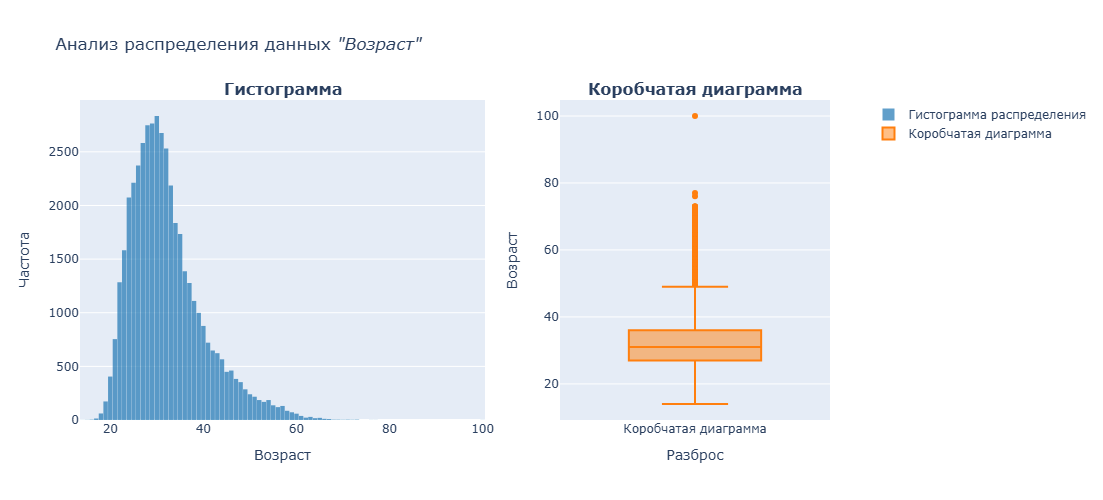

In [21]:
# Отдельно гистограмма
# import plotly.express as px
# fig = px.histogram(df, x="Возраст")
# fig.show()
# отдельно боксплот
# fig = px.box(df, x="Возраст")
# fig.show()

# читать https://plotly.com/python/multiple-axes/ и deepseek

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # для добавления двух графиков

# Создаем макет двух визуализаций рядом
fig = make_subplots(
    rows=1, # эти строки определяют количество графиков (одна строка)
    cols=2, # и два макета
    subplot_titles=("<b>Гистограмма</b>", "<b>Коробчатая диаграмма</b>"),
    column_widths=[0.9, 0.6]  # Ширина макетов
)

# чтобы 
# Добавляем гистограмму (левый график)
fig.add_trace(
    go.Histogram(
        x=df['Возраст'],
        #nbinsx=30,  # Количество бинов
        marker_color='#1f77b4',
        opacity=0.7, # прозрачность заливки
        name="Гистограмма распределения"
    ),
    row=1, col=1
)

# Добавляем box plot (правый график)
fig.add_trace(
    go.Box(
        y=df['Возраст'],
        # boxpoints='all', это не включать, вообще все показывает
        boxpoints='outliers',  # Показывать только выбросы
        marker_color='#ff7f0e',
        name="Коробчатая диаграмма"
    ),
    row=1, col=2
)

# Настраиваем оформление
fig.update_layout(
    title_text="Анализ распределения данных <i>\"Возраст\"</i>",
    legend=dict(x=1.2, xanchor="center"), # сдвиг легенды по Х и выравнивание
    height=500,
    width=1100, # абсолютная ширина двух макетов
    showlegend=True, # показывать ли легенду
    bargap=0.05 # Расстояние между столбцами гистограммы
)

# Настройка осей
fig.update_xaxes(title_text="Возраст", row=1, col=1)
fig.update_xaxes(title_text="Разброс", row=1, col=2)
fig.update_yaxes(title_text="Частота", row=1, col=1)
fig.update_yaxes(title_text="Возраст", row=1, col=2)

fig.show()

fig.write_html("img_html_from_plotly/hist_age_plot.html")

Гистограмму можно посмотреть [здесь](http://htmlpreview.github.io/?https://github.com/greyzy-gh/HH_CV_Analysis_SF_PROJECT-1/blob/main/img_html_from_plotly/hist_age_plot.html)

**Выводы:**
1. Модальное значение признака *"Возраст"* - **30 лет**;
2. Возраст большинства соискателей находится в диапазоне **27-36 лет**;
3. Средний возраст соискателей - **31 год**;
4. Самый молодой соискатель - **14 лет**, самый старший - **77 лет**;
5. Бросающийся в глаза выброс - значение **100 лет**, его, вероятно, указали ошибочно или намеренно неверно;
6. С возрастом количество соискателей уменьшается. Значений выше **60 лет** мало, но они есть, их нельзя отнести к выбросам, люди в данных возрастных категориях также нуждаются в работе. Я бы выделил возрастную категорию в отдельный набор данных (например, 45+).

***

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

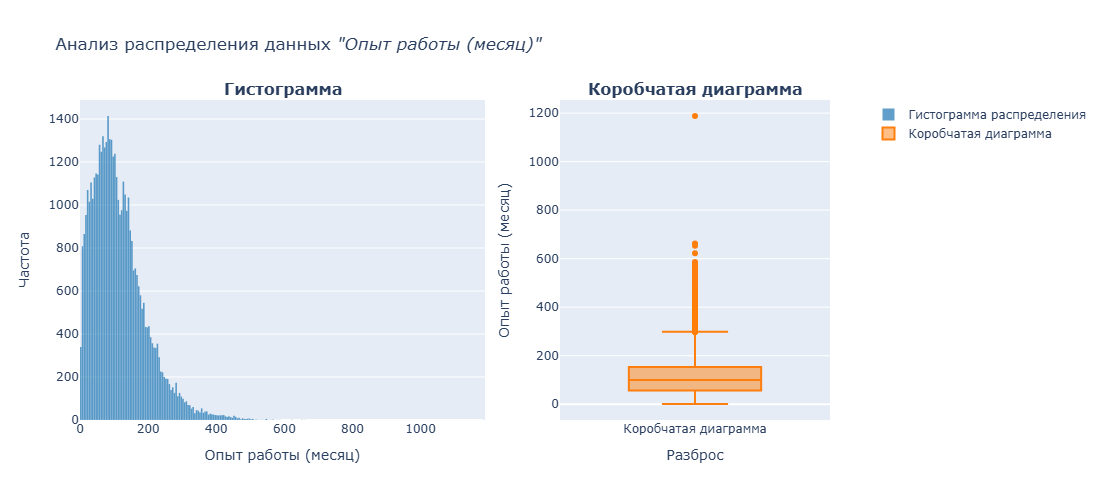

In [17]:
import plotly.express as px
from plotly.subplots import make_subplots # для добавления двух графиков

# Создаем макет двух визуализаций рядом
fig = make_subplots(
    rows=1, # эти строки определяют количество графиков (одна строка)
    cols=2, # и два макета
    subplot_titles=("<b>Гистограмма</b>", "<b>Коробчатая диаграмма</b>"),
    column_widths=[0.9, 0.6]  # Ширина макетов
)

# чтобы 
# Добавляем гистограмму (левый график)
fig.add_trace(
    go.Histogram(
        x=df['Опыт работы (месяц)'],
        #nbinsx=30,  # Количество бинов
        marker_color='#1f77b4',
        opacity=0.7, # прозрачность заливки
        name="Гистограмма распределения"
    ),
    row=1, col=1
)

# Добавляем box plot (правый график)
fig.add_trace(
    go.Box(
        y=df['Опыт работы (месяц)'],
        # boxpoints='all', это не включать, вообще все показывает
        boxpoints='outliers',  # Показывать только выбросы
        marker_color='#ff7f0e',
        name="Коробчатая диаграмма"
    ),
    row=1, col=2
)

# Настраиваем оформление
fig.update_layout(
    title_text="Анализ распределения данных <i>\"Опыт работы (месяц)\"</i>",
    legend=dict(x=1.2, xanchor="center"), # сдвиг легенды по Х и выравнивание
    height=500,
    width=1100, # абсолютная ширина двух макетов
    showlegend=True, # показывать ли легенду
    bargap=0.05 # Расстояние между столбцами гистограммы
)

# Настройка осей
fig.update_xaxes(title_text="Опыт работы (месяц)", row=1, col=1)
fig.update_xaxes(title_text="Разброс", row=1, col=2)
fig.update_yaxes(title_text="Частота", row=1, col=1)
fig.update_yaxes(title_text="Опыт работы (месяц)", row=1, col=2)

fig.show()

fig.write_html("img_html_from_plotly/hist_experience_plot.html")

Гистограмму можно посмотреть [здесь](http://htmlpreview.github.io/?https://github.com/greyzy-gh/HH_CV_Analysis_SF_PROJECT-1/blob/main/img_html_from_plotly/hist_experience_plot.html)

**Выводы:**
1. Модальное значение признака *"Опыт работы (месяц)"* - **80-84 месяца**;
2. Опыт работы большинства соискателей находится в диапазоне **57-154 месяцев**;
3. Средний опыт работы - **100 месяцев**;
4. минимальный опыт работы - **1 месяц**, самый большой - **1188 месяцев**;
5. Бросающийся в глаза выброс - значение **1188 месяцев** (*99 лет*), его, вероятно, указали ошибочно или намеренно неверно, возможно, это тот же самый соискатель, который указал возраст 100 лет;
6. Опыт работы *300 месяцев (25 лет стажа)* приблизительно соответствует тому, как молодой человек 18-20 лет начал трудовую деятельность. Велика вероятность того, что соискатели с возрастом 45+ имеют опыт работы от 300 месяцев, как и в предыдущем выводе хочется данных соискателей выделить в отдельную группу.

***

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


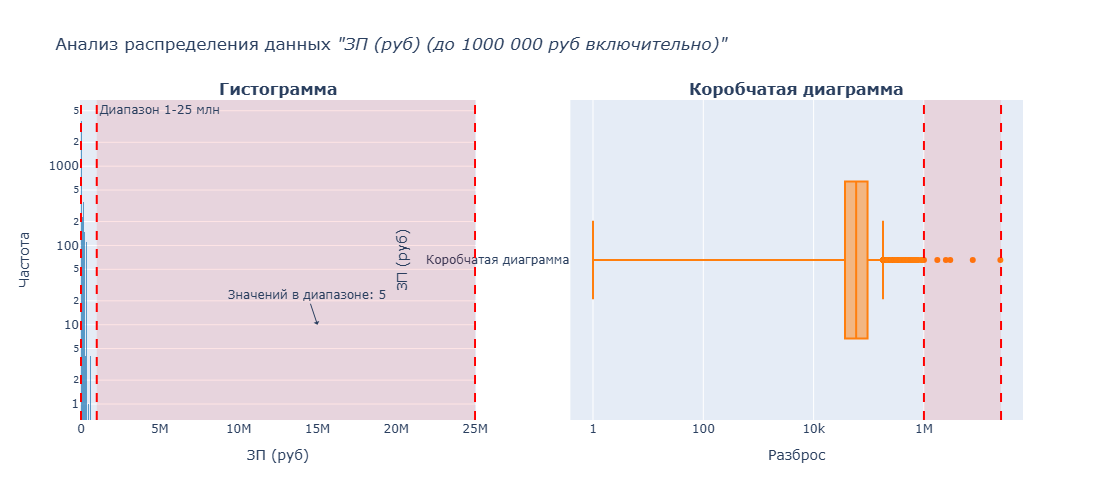

In [18]:
import plotly.express as px
from plotly.subplots import make_subplots # для добавления двух графиков

# долго колдовал с log-графиком, Mike подсказал такой код:
# fig = px.histogram(
#     data_frame=df,
#     x='ЗП (руб)',
#     title='Распределение соискателей по заработной плате',
#     histnorm='percent',
#     marginal='box',
# )

# fig.show()
# но я добил лог-масштаб, надо было брать по Y

# Создаем макет двух визуализаций рядом
fig = make_subplots(
    rows=1, # эти строки определяют количество графиков (одна строка)
    cols=2, # и два макета
    subplot_titles=("<b>Гистограмма</b>", "<b>Коробчатая диаграмма</b>"),
    column_widths=[0.7, 0.8]  # Ширина макетов
)

# Добавляем гистограмму (левый график)
fig.add_trace(
    go.Histogram(
        x=df['ЗП (руб)'],
        #nbinsx=100,  # Количество бинов
        marker_color='#1f77b4',
        opacity=0.7, # прозрачность заливки
        name="Гистограмма распределения"
    ),
    row=1, col=1
)

# Добавляем box plot (правый график)
fig.add_trace(
    go.Box(
        x=df['ЗП (руб)'],
        # boxpoints='all', это не включать, вообще все показывает
        boxpoints='outliers',  # Показывать только выбросы
        marker_color='#ff7f0e',
        name="Коробчатая диаграмма"
    ),
    row=1, col=2
)

# Настраиваем оформление
fig.update_layout(
    title_text="Анализ распределения данных <i>\"ЗП (руб) (до 1000 000 руб включительно)\"</i>",
    #legend=dict(x=1.2, xanchor="center"), # сдвиг легенды по Х и выравнивание
    height=500,
    width=1100, # абсолютная ширина двух макетов
    showlegend=False, # показывать ли легенду
    # bargap=0.05 # Расстояние между столбцами гистограммы

    # yaxis_type='log',  # логарифмическую шкалу можно включать здесь, а не здесь:
    # fig.update_xaxes(title_text="Разброс", row=1, col=2, type='log')

)

# Настройка осей
fig.update_xaxes(title_text="ЗП (руб)", row=1, col=1) # почему-то гистрограмма при лог-шкале икс не строит ничего, не разобрался
fig.update_xaxes(title_text="Разброс", row=1, col=2, type='log') # бокс плот вытягиваем по X
fig.update_yaxes(title_text="Частота", row=1, col=1, type='log') # гистограмму вытягиваем по Y
fig.update_yaxes(title_text="ЗП (руб)", row=1, col=2)

# Добавляем вертикальные линии для выделения диапазона
fig.add_vline(x=0, line_dash='dash', line_color='red')
fig.add_vline(x=1000000, line_dash='dash', line_color='red')
fig.add_vline(x=25000000, line_dash='dash', line_color='red')

# Добавление заливки определенного диапазона
fig.add_vrect(x0=1000000, x1=25000000, 
             fillcolor="red", opacity=0.1, line_width=0,
             annotation_text="Диапазон 1-25 млн", 
             annotation_position="top left")

# Подсчет и отображение статистики, на боксплоте почему-то не отображается
count_in_range = len(df[(df['ЗП (руб)'] > 1000000) & (df['ЗП (руб)'] <= 25000000)])
fig.add_annotation(
    x=15000000, y=1,
    text=f"Значений в диапазоне: {count_in_range}",
    showarrow=True,
    arrowhead=1
)

# Настройка оси X для лучшего отображения
# с боксплот одновременно не использовать
# fig.update_xaxes(
#     range=[0, 26000000],  # Фиксируем диапазон
#     tickvals=[0, 500000, 1000000, 5000000, 10000000, 15000000, 20000000, 25000000],
#     ticktext=['0', '500K', '1M', '5M', '10M', '15M', '20M', '25M']
# )

fig.show()

fig.write_html("img_html_from_plotly/hist_salary_plot.html")

Гистограмму можно посмотреть [здесь](http://htmlpreview.github.io/?https://github.com/greyzy-gh/HH_CV_Analysis_SF_PROJECT-1/blob/main/img_html_from_plotly/hist_salary_plot.html)

**Выводы:**
1. Модальное значение признака *"ЗП (руб)"* - **50-52 т. руб.**;
2. Ожидания по зарплате большинства соискателей находятся в диапазоне **37-95 т. руб.**;
3. Среднее значение ожидаемой зарплаты - **59 т. руб.**;
4. минимальная указанная зарплата - **1 рубль**, максимальная - **24,3 млн. руб.**;
5. Значений зарплаты *больше 1 млн. руб.* - **5**. Вероятно, указаны ошибочно (опечатка) или намеренно неверно;
6. Впрочем, значения и близкие к 1 млн. руб. видятся чрезмерными, хотя, разумеется, нужно проанализировать позиции, а также заявленные навыки.

***

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

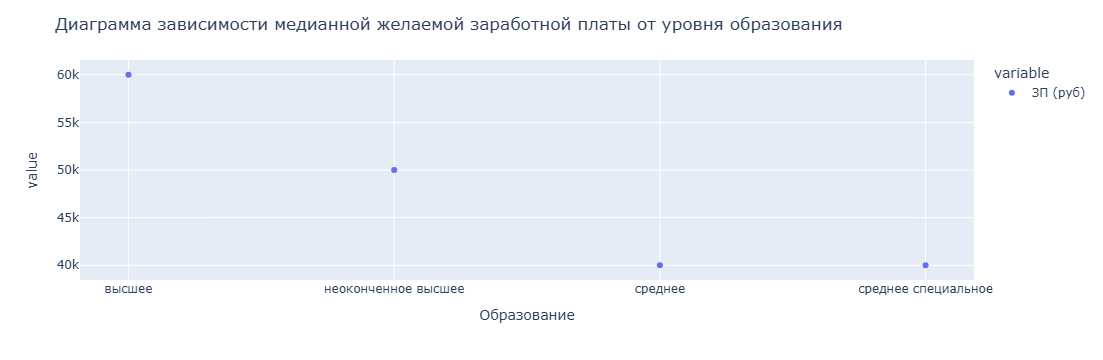

In [22]:
import plotly.express as px
# выделяем данные, где зарплата меньше 1 млн.
df_mln = df[df['ЗП (руб)'] < 1000000]

# ВАРИАНТ 1, получить DF и построить гистограмму

# df_groupby = df_mln.groupby('Образование')['ЗП (руб)'].median()
# получаем из series df_groupby DF (идиоматичный способ)
# df_groupby = df_groupby.reset_index()
# можно еще вот так:
# df_groupby_2  = pd.DataFrame({
#     'Образование': df_groupby.index,  # Колонка из индексов
#     'ЗП (руб)': df_groupby.values  # Колонка из значений
# })

# строим гистограмму
# fig = px.histogram(df_groupby_2,
#                    x = df_groupby_2['Образование'],
#                    y = df_groupby_2['ЗП (руб)'],
#                    width = 1000)
# fig.show()

# ВАРИАНТ 2. - посмотрим на диаграмму рассеяния
fig = px.scatter(df_mln.groupby('Образование')['ЗП (руб)'].median(),
                 width = 1000)
fig.update_layout(
    title_text="Диаграмма зависимости медианной желаемой заработной платы от уровня образования")
    
fig.show()

fig.write_html("img_html_from_plotly/hist_median_salary_education_plot.html")

Гистограмму можно посмотреть [здесь](http://htmlpreview.github.io/?https://github.com/greyzy-gh/HH_CV_Analysis_SF_PROJECT-1/blob/main/img_html_from_plotly/hist_median_salary_education_plot.html)

**Выводы:**
1. Наибольший уровень желаемой заработной платы (**медианные 60 т. руб.**) характерна для людей с *высшим образованием*;
2. Наиименьший уровень желаемой заработной платы (**медианные 40 т. руб.**) характерна для людей со *средним и средне специальным образованием*;
3. Средними ожиданиями (**медианные 50 т. руб.**) обладают люди с *неоконченным высшим образованием*;
4. *Разница между средним* (средне специальным) *и высшим* образованием в уровнях желаемой заработной платы составляет **1,5 раза**;
5. Достаточно очевидно, что *признак уровня образования имеет значение* при прогнозировании заработной платы.

***

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

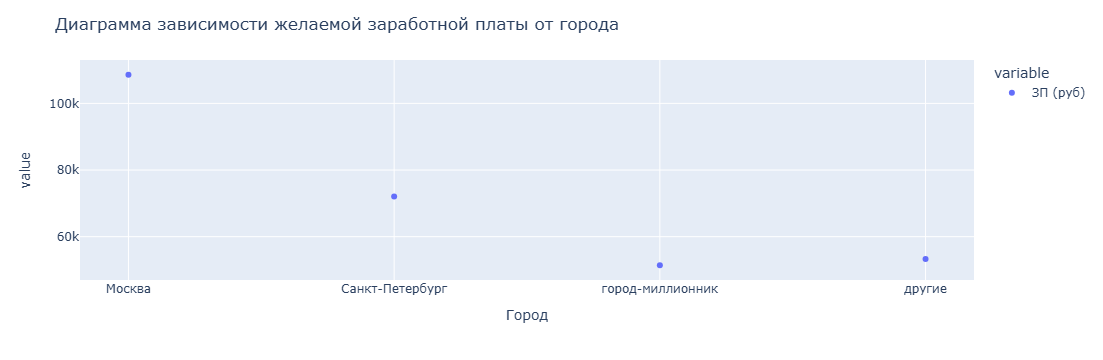

In [26]:
import plotly.express as px

# выделяем данные, где зарплата меньше 1 млн.
df_mln = df[df['ЗП (руб)'] < 1000000]

fig = px.scatter(df_mln.groupby('Город')['ЗП (руб)'].mean(),
                 width = 1000)
fig.update_layout(
    title_text="Диаграмма зависимости желаемой заработной платы от города")
    
fig.show()

fig.write_html("img_html_from_plotly/hist_salary_city_plot.html")

Гистограмму можно посмотреть [здесь](http://htmlpreview.github.io/?https://github.com/greyzy-gh/HH_CV_Analysis_SF_PROJECT-1/blob/main/img_html_from_plotly/hist_salary_city_plot.html)

**Выводы:**
1. Наибольший уровень желаемой заработной платы (**средняя 109 т. руб.**) характерна для **Москвы**;
2. Второй по величине уровень желаемой заработной платы (**средняя 72 т. руб.**) характерен для **Санкт-Петербурга**;
3. **В городах-миллионниках и других городах** медианный желаемый уровень заработной платы находится на уровне **52-53 т. руб.**;
4. *Разница со столицей* составляет больше, чем **2 раза**, со *второй столицей* - **почти в 1,5 раза**;
5. Достаточно очевидно, что *признак города имеет значение* при прогнозировании заработной платы.

***

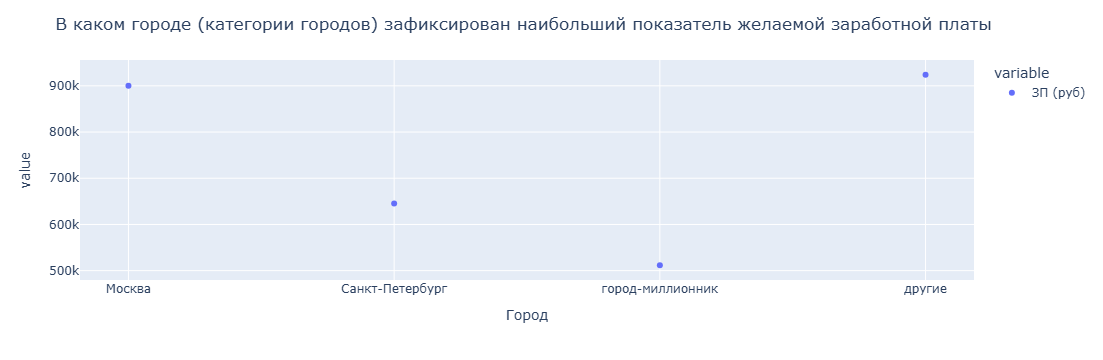

In [32]:
# Задание 4.5 В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?
fig = px.scatter(df_mln.groupby('Город')['ЗП (руб)'].max(),
                 width = 1000)
fig.update_layout(
    title_text="В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы")

fig.show()

fig.write_html("img_html_from_plotly/hist_salary_max_city_plot.html")

# ответ: Другие

Гистограмму можно посмотреть [здесь](http://htmlpreview.github.io/?https://github.com/greyzy-gh/HH_CV_Analysis_SF_PROJECT-1/blob/main/img_html_from_plotly/hist_salary_max_city_plot.html)
***

In [149]:
# # ХОЧУ ДИАГРАММУ С КОЛИЧЕСТВОМ РАЗНЫХ УРОВНЕЙ ОБРАЗОВАНИЯ ПО ГОРОДАМ
# import plotly.express as px

# # выделяем данные, где зарплата меньше 1 млн.
# df_mln = df[df['ЗП (руб)'] < 1000000]
# # группируем
# df_city_edu = df_mln.groupby(['Город', 'Образование'])['Образование'].count()

# # Загоняем мультииндексы в DF
# df_city_edu_1 = df_city_edu.index.to_frame(index=False, name=['Город', 'Образование'])

# # Делаем df с колонкой Count и в значения записываем список из подсчитанных значений
# # индекс по умолчанию начинается по порядку с нуля
# df_city_edu_2 = pd.DataFrame({'Count': df_city_edu.to_list()}) #index=[0, 1, 2, 3]
# # и теперь джойним
# df_city_edu = df_city_edu_1.join(df_city_edu_2, how='inner')
# # через fig = px.histogram(.. получается не совсем, как хотел
# fig = px.histogram(df_mln, x="Город", color="Образование", width = 800)
# fig.show()

# # вот так нагляднее строим диаграмму
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10, 5))

# barplot = sns.barplot(
#     data=df_city_edu,
#     x="Город",
#     y="Count",
#     hue='Образование',
# )
# barplot.set_title('Количество соискателей в зависимости от уровня образования и проживания', fontsize=10);
# barplot.set_xlabel('Город')
# barplot.set_ylabel('Количество соискателей');

# # но диаграмма в таком виде скорее некорректна, так как сравнивать нужно не абсолютное количество
# # в городе, а по отношению к населению, ну и сравнивать по городам, а у нас две позиции "сборных" - 
# # города-миллионники и "другие"

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

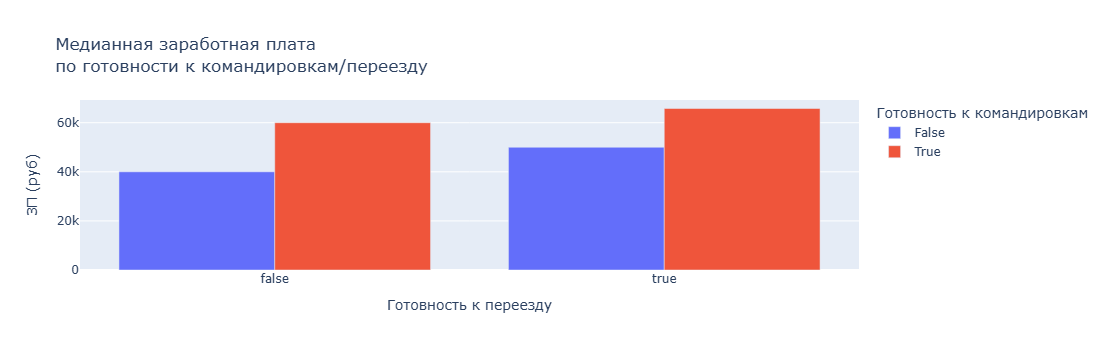

In [33]:
# МОЕ РЕШЕНИЕ ОКАЗАЛОСЬ НЕВЕРНЫМ, потому что,
# во-первых, не было указания использовать данные с 
# зарплатой до 1 млн. (правило "как и в предыдущих заданиях" тут не подействовало:)
# во-вторых, двоякое толкование задания "зависимость ЗП от признаков Переезд и Командировка",
# я исходил, что нужно показать две зависимости (Переезд и Командировка) на одном графике,
# но без отношения друг к другу,
# а подразумевалось показать зависимости в совокупности этих признаков, то есть получилось
# четыре группы НЕ ГОТОВ НЕ ГОТОВ, ГОТОВ НЕ ГОТОВ, НЕ ГОТОВ ГОТОВ и ГОТОВ ГОТОВ

# # для того, как я понял, тут вроде все правильно
# import plotly.express as px  
# import plotly.graph_objects as go

# # # выделяем данные, где зарплата меньше 1 млн.
# df_mln = df[df['ЗП (руб)'] < 1000000]
# # делаем таблицы с медианными зарплатами готовых/неготовых к переезду и командировке
# df_mln_pereezd = df_mln.groupby(['Готовность к переезду'])['ЗП (руб)'].median().reset_index()
# df_mln_komand = df_mln.groupby(['Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

# # display(df_mln_pereezd)
# # 	Готовность к переезду	ЗП (руб)
# # 0	False	                50000.000
# # 1	True	                4131.165

# # display(df_mln_komand)
# # 	Готовность к командировкам	ЗП (руб)
# # 0	False	                    40000.0
# # 1	True	                    65000.0

# # заменим True и False
# df_mln_pereezd['Готовность к переезду'] = df_mln_pereezd['Готовность к переезду'].map({True: 'Готов', False: 'Не готов'})
# df_mln_komand['Готовность к командировкам'] = df_mln_komand['Готовность к командировкам'].map({True: 'Готов', False: 'Не готов'})

# # строим график
# fig = go.Figure()
# fig.add_trace(go.Bar(x = df_mln_pereezd['Готовность к переезду'],
#                            y = df_mln_pereezd['ЗП (руб)'],
#                            name='Готовность к переезду'))
# fig.add_trace(go.Bar(x = df_mln_komand['Готовность к командировкам'],
#                            y = df_mln_komand['ЗП (руб)'],
#                            name='Готовность к командировкам'))
# fig.update_layout(
#     title_text='Зависимость медианной заработной платы \"ЗП (руб)\" <br>от признаков \"Готовность к переезду\" <br>и \"Готовность к командировкам\"',
#     legend=dict(x=1.5, xanchor="center"), # сдвиг легенды по Х и выравнивание
#     height=350,
#     width=700, # абсолютная ширина двух макетов
#     #showlegend=False, # показывать ли легенду
#     bargap=0.5, # Расстояние между столбцами гистограммы

#     #yaxis_type='log',  # логарифмическую шкалу можно включать здесь, а не здесь:
# )
# fig.update_xaxes(title_text="Разброс")

# fig.show()

# поэтому использую решение с платформы, лучше я не придумаю (используется весь датафрейм)
bar_data = df.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()

# Задание 4.6 - 66 т.р. следовательно

# также группировать можно так, стратегически, не знаю, где правильнее сбрасывать индексы
# bar_data = df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()
fig = px.bar(
    data_frame=bar_data,
    x='Готовность к переезду',
    y='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    #orientation='h',
    title='Медианная заработная плата<br>по готовности к командировкам/переезду'
)
fig.update_layout(
    height=350,
    width=700,
)
fig.show()

fig.write_html("img_html_from_plotly/hist_median_salary_trip_moving_plot.html")

Гистограмму можно посмотреть [здесь](http://htmlpreview.github.io/?https://github.com/greyzy-gh/HH_CV_Analysis_SF_PROJECT-1/blob/main/img_html_from_plotly/hist_median_salary_trip_moving_plot.html)

**Выводы:**
1. Наибольший уровень желаемой заработной платы (около **медианных 66 т. руб.**) характерна для соискателей, *готовых и к переезду и к командировкам*;
2. Наименьший уровень желаемой заработной платы (**медианные 40 т. руб.**) характерна для соискателей, *не готовых ни к переезду, ни к командировкам*;
3. Чуть меньший уровень желаемой заработной платы, чем максимальное значение (**медианные 60 т. руб.**) наблюдается у соискателетей, *не готовых к переезду, но готовых к командировкам*;
4. Видно, что соискатели, *"готовые на все"*, ожидают за это *повышенного уровня* оплаты труда;
5. Обратно, те соискатели, которым *"и тут хорошо"*, заявляют *самые низкие требования* к заработной плате.
6. *Готовность к командировкам* оценивается соискателями как *дополнительная нагрузка*, за которую ожидают *повышенный уровень* оплаты труда.

***

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

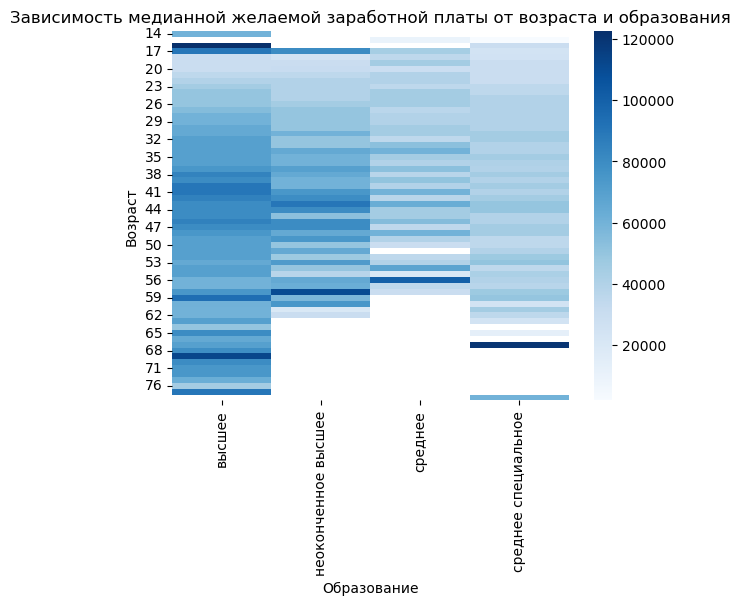

In [151]:
# можно построить через группировку
# df_cur_age_edu = df.groupby(['Возраст', 'Образование'])['ЗП (руб)'].median().unstack()
# но задание сделать сводную таблицу

# неплохая статья про pivot сводные таблицы
# https://dfedorov.spb.ru/pandas/Сводная%20таблица%20в%20pandas.html
pivot = pd.pivot_table(df,
                       index = 'Возраст',
                       values='ЗП (руб)',     # значение, к которому применяем аггрегирующую функцию
                       columns='Образование',
                       aggfunc = 'median')    # способ аггрегирования

heatmap = sns.heatmap(data=pivot,
                      cmap = "Blues"
                     )
heatmap.set_title('Зависимость медианной желаемой заработной платы от возраста и образования', fontsize=12);

# Задание 4.7 - высшее

**Выводы:**
1. Наибольший уровень желаемой средней заработной платы (**от 50 т. руб. и выше**) характерна для соискателей, имеющих *высшее и неоконченное высшее* образование и *старше 25 лет*;
2. Наименьший уровень желаемой средней заработной платы (**до 60 т. руб.**) характерна для соискателей, имеющих *среднее и среднее специальное* образование;
3. Отмечаются некоторые выскоки в значениях, так есть значения **выше 100 т. руб.** у соискателей *возрастом 16-17 лет*. Данные цифры либо ошибочно указаны, либо это опечатки, принимая во внимание, что в этом возрасте, если человек не вундеркинд, у него не может быть высшего образования;
4. Высокие значения желаемых средних заработных плат (**вышел 80 т. руб.**) наблюдаются во всех категориях *после 50 лет*, это, вероятно, обусловлено тем, что люди этого возраста имеют либо богатый опыт работы, либо являются обладателем каких-то специфических знаний;
5. Самые требовательные кандидаты имеют высшее образование, возраст 37-42 года. В этом возрасте, скорее всего, наблюдается пик профессионального развития наряду с тем, что "до пенсии" еще далеко.

***

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

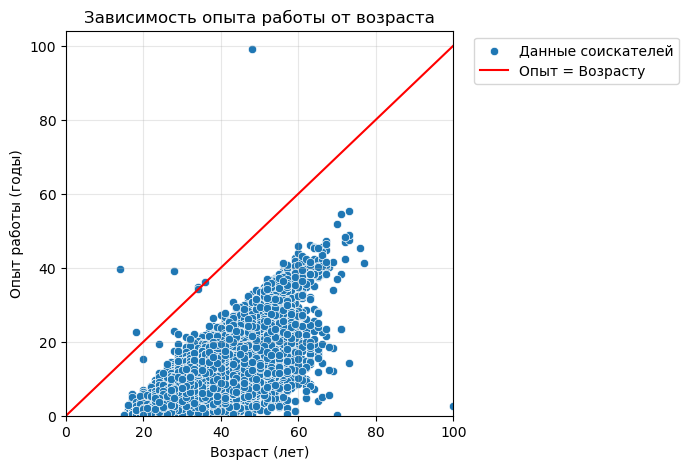


Количество точек, находящихся выше прямой - 7


In [152]:
# уточнил у дипсика, в принципе все сделано, как я примерно, понравился п. 4
# про выделение аномалий
# 1. Конвертация месяцев в годы и создание новой колонки
# df['Опыт работы (годы)'] = df['Опыт работы (месяц)'] / 12

# # 2. Настройка графика
# plt.figure(figsize=(5, 5))
# plt.scatter(df['Возраст'], df['Опыт работы (годы)'], 
#             alpha=0.4, 
#             label='Данные соискателей')

# # 3. Построение прямой y = x (через (0,0) и (100,100))
# plt.plot([0, 100], [0, 100], 
#          'r--', 
#          linewidth=2, 
#          label='Опыт = Возрасту')

# # 4. Выделение аномалий (опыт ≥ возраста)
# anomalies = df[df['Опыт работы (годы)'] >= df['Возраст']]
# plt.scatter(anomalies['Возраст'], anomalies['Опыт работы (годы)'], 
#             color='red', 
#             marker='x', 
#             s=100, 
#             label='Аномалии (опыт ≥ возраста)')

# # Настройка оформления
# plt.title('Зависимость опыта работы от возраста')
# plt.xlabel('Возраст (годы)')
# plt.ylabel('Опыт работы (годы)')
# plt.grid(alpha=0.3)
# plt.legend()
# plt.xlim(0, 100)  # Ограничение оси X согласно прямой
# plt.ylim(0, df['Опыт работы (годы)'].max() + 5)  # +5 для запаса по Y

# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(5, 5))

sns.scatterplot(data=df,
                x = 'Возраст',
                y = df['Опыт работы (месяц)'].apply(lambda x: x / 12),
               label='Данные соискателей') # метка для легенды, без нее plt.legend() не имеет смысла

data_line = {'x': [0, 100],
             'y': [0, 100]}
data_line = pd.DataFrame(data_line)

sns.lineplot(data=data_line,
             x="x",
             y="y",
             label='Опыт = Возрасту',     # метка для легенды, без нее plt.legend() не имеет смысла
             color='r'
            )

plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст (лет)')
plt.ylabel('Опыт работы (годы)')
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.6, 1)) # loc='upper right' - остается внутри графика, закрывает верхний выброс
plt.xlim(0, 100)  # Ограничение оси X согласно прямой
plt.ylim(0, df['Опыт работы (месяц)'].apply(lambda x: x / 12).max() + 5)  # +5 для запаса по Y
plt.show()

# Задание 4.8
# Сколько точек лежат строго выше построенной прямой? Так как точки могут сливаться с прямой,
# то для ответа на этот вопрос проще всего воспользоваться интерактивной визуализацией либо
# получить таблицу с наблюдениями, лежащими выше прямой с помощью фильтрации.

df_opyt_bol_age = df.copy()
df_opyt_bol_age['Опыт работы (годы)'] = df_opyt_bol_age['Опыт работы (месяц)']/12
df_opyt_bol_age_2 = df_opyt_bol_age[df_opyt_bol_age['Опыт работы (годы)'] > df_opyt_bol_age['Возраст']]
df_opyt_bol_age_2.shape[0]
print(f'\nКоличество точек, находящихся выше прямой - {df_opyt_bol_age_2.shape[0]}')


**Выводы:**
1. В общей массе нельзя сказать, что *"чем старше человек, тем больше опыт"*, даже после сорока и даже после шестидесяти лет есть люди, у которых почти нет опыта работы;
2. На и за красной линией находятся значения, где опыт работы равен или больше возраста, что, безусловно, является ошибкой при указании данных (или намеренное указание неверной информации) и нуждаются в коррекции или удалении;
3. Следует заметить, что данную линию нужно было бы строить не по закону "x = y", а, скажем "x = y + 10". В более раннем возрасте, только если это не китайский ребенок с завода Apple, маловероятно начинание трудовой деятельности в нашей стране;

***

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".

Посмотрим на некоторые признаки в разрезе половой дифференциации.

***

1. Построим тепловую карту зависимости уровня желаемой заработной платы от возраста и пола с течением времени



===================================== ЦИФРЫ =====================================

Процент женских резюме 19.08%

Процент мужских резюме 80.92%

Количество женских и мужских резюме

Пол
М    35997
Ж     8488
Name: count, dtype: int64

===================================== ГРАФИК =====================================


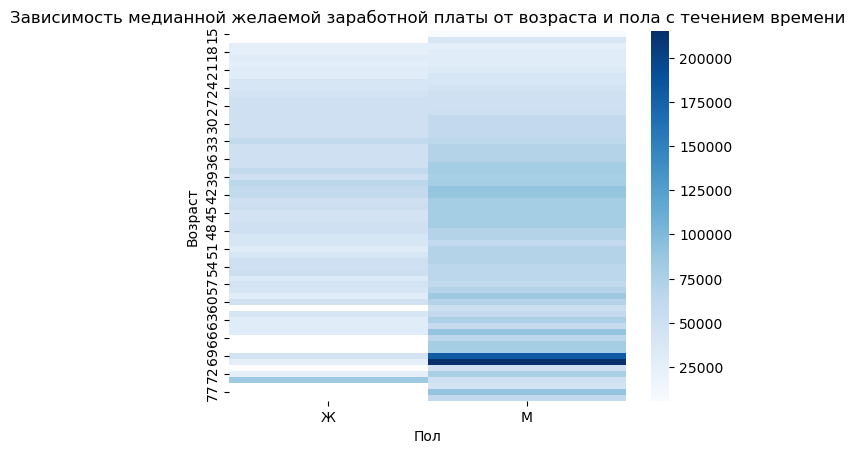

In [162]:
# Посмотрим, сколько мужских и женских резюме

pers_woman = round(df['Пол'].value_counts(normalize=True)*100, 2).loc['Ж']

print('\n===================================== ЦИФРЫ =====================================')

print(f'\nПроцент женских резюме {pers_woman}%')
pers_man = round(df['Пол'].value_counts(normalize=True)*100, 2).loc['М']
print(f'\nПроцент мужских резюме {pers_man}%')
print('\nКоличество женских и мужских резюме\n')
print(df['Пол'].value_counts())

print('\n===================================== ГРАФИК =====================================')
# А также построим тепловую карту
pivot_sex = pd.pivot_table(df,
                       index = 'Возраст',
                       values='ЗП (руб)',     # значение, к которому применяем аггрегирующую функцию
                       columns='Пол',
                       aggfunc = 'median')    # способ аггрегирования

heatmap = sns.heatmap(data=pivot_sex,
                      cmap = "Blues"
                     )
heatmap.set_title('Зависимость медианной желаемой заработной платы от возраста и пола с течением времени', fontsize=12);

**Выводы:**
1. Диаграмма показывает, что в общей массе ожидания мужчин по зарплате выше, чем у женщин, уже начиная с 23-25-летнего возраста;
2. И у мужчин и у женщин, в подтверждение к предыдущей карте, максимум ожиданий приходится на возраст 38-42 года;
3. С возрастом мужчины продолжнают поддерживать достаточно высокий уровень ожиданий по заработной плате, в то время как у женщин он относительно равномерный в процессе всей трудовой деятельности (кроме п. 2)и даже, возможно, снижаются.

***

Также посмотрим на этот график "сбоку":

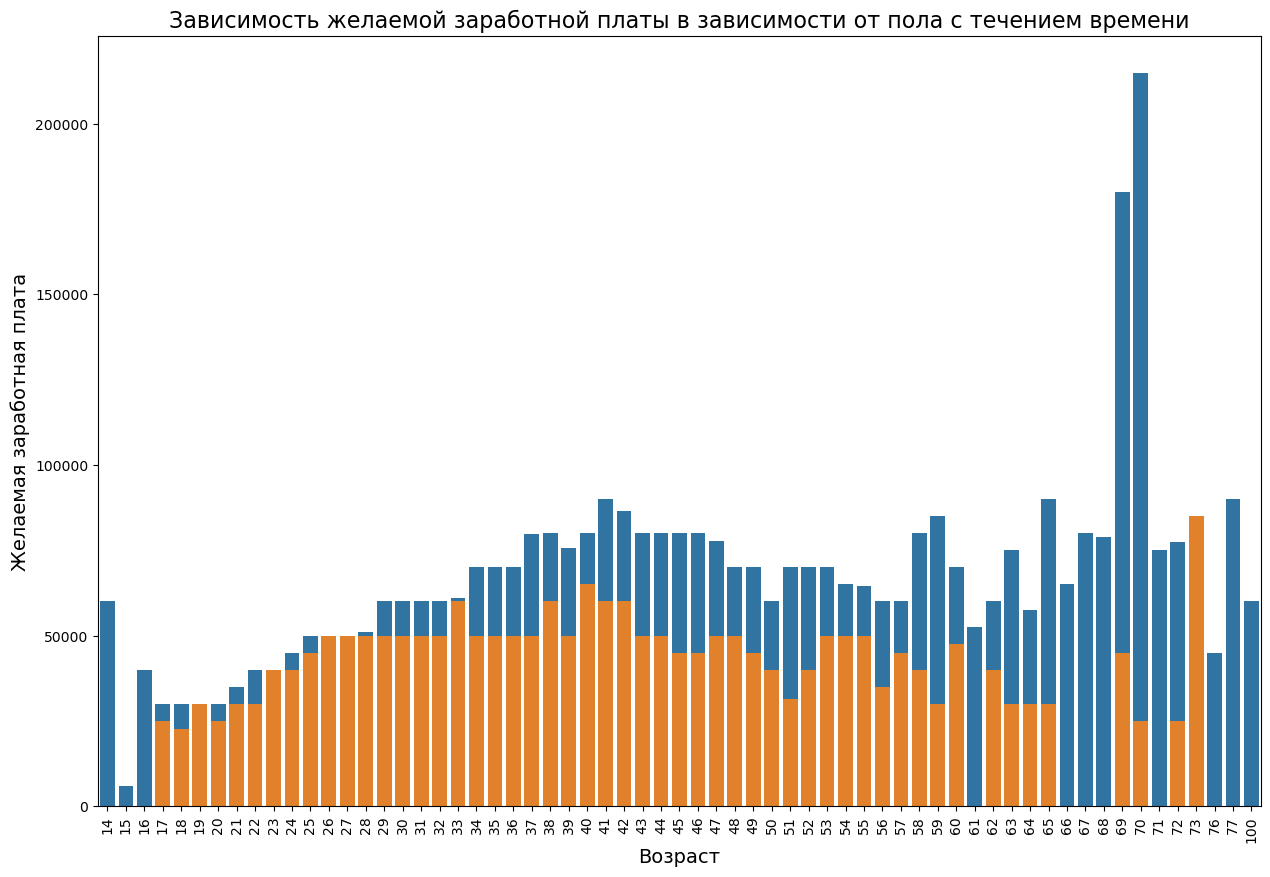

In [154]:
fig, axes = plt.subplots(figsize=(15, 10))
barplot1 = sns.barplot(
    data=pivot_sex,
    x='Возраст',
    y='М',
    #orient='v',
)
barplot1.tick_params(axis='x', rotation=90);
barplot1.set_title('Зависимость желаемой заработной платы в зависимости от пола с течением времени', fontsize=16);
barplot1.set_xlabel('Возраст', fontsize=14);
barplot1.set_ylabel('Желаемая заработная плата', fontsize=14);
#barplot1.grid()

barplot2 = sns.barplot(
    data=pivot_sex,
    x='Возраст',
    y='Ж',
    #orient='v',
    #ax = axes[0],
)

***

2. Построим, сколько мужчин и женщин готовы к командировкам и переездам

===================================== ЦИФРЫ =====================================

Процент мужчин, готовых к командировкам 72.73%

Процент женщин, готовых к командировкам 62.21%

Процент мужчин, готовых к пеерезду 37.94%

Процент женщин, готовых к пеерезду 26.78%
===================================== ГРАФИКИ =====================================


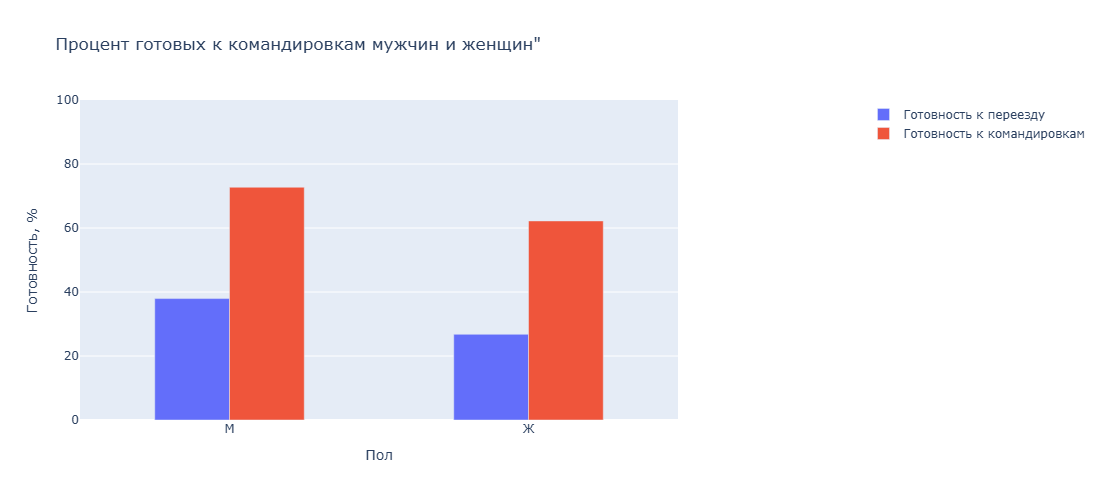

In [34]:
# кто чаще готов к переезду и к командировкам
# сделаем просто в лоб, сначала определяем в процентах
# (так как количество мужчин и женщин у нас существенно различается)

df_man = df[df['Пол'] == 'М']
df_woman = df[df['Пол'] == 'Ж']

# готовность к командировкам

print('===================================== ЦИФРЫ =====================================')

komand_man = round(df_man['Готовность к командировкам'].value_counts(normalize=True)*100, 2).loc[True]
print(f'\nПроцент мужчин, готовых к командировкам {komand_man}%')

komand_woman = round(df_woman['Готовность к командировкам'].value_counts(normalize=True)*100, 2).loc[True]
print(f'\nПроцент женщин, готовых к командировкам {komand_woman}%')

# готовность к пееездам
pereezd_man = round(df_man['Готовность к переезду'].value_counts(normalize=True)*100, 2).loc[True]
print(f'\nПроцент мужчин, готовых к пеерезду {pereezd_man}%')

pereezd_woman = round(df_woman['Готовность к переезду'].value_counts(normalize=True)*100, 2).loc[True]
print(f'\nПроцент женщин, готовых к пеерезду {pereezd_woman}%')

print('===================================== ГРАФИКИ =====================================')

# для интереса посчитал готовых на вахту, 8 и 2 % соответственно у мужчин и женщин
# vaht_man = round(df_man['вахтовый метод'].value_counts(normalize=True)*100, 2).loc[True]
# print(f'\nПроцент мужчин, готовых к вахтовому методу работы {vaht_man}%')

# vaht_woman = round(df_woman['вахтовый метод'].value_counts(normalize=True)*100, 2).loc[True]
# print(f'\nПроцент женщин, готовых к вахтовому методу работы {vaht_woman}%')

# Соберем полученные данные в таблицу
df_per_kom_sex = {'Готовность к командировкам': [komand_man, komand_woman],
              'Готовность к переезду': [pereezd_man, pereezd_woman]
              }
df_per_kom_sex = pd.DataFrame(df_per_kom_sex, index = ['М', 'Ж'])

# построим диаграмму
# С помощью plotly графики рисуются с помощью следующей общей конструкции:

# fig = go.Figure()
#     fig.add_trace(что рисовать)
#     fig.update_layout(параметры фигуры)
#     fig.update_xaxes(параметры оси абсцисс)
#     fig.update_yaxes(параметры оси ординат)
#     fig.show()
# Теперь нарисуем наши функции с помощью plotly.
    
fig = go.Figure()
fig.add_trace(go.Bar(x = df_per_kom_sex.index,
                           y = df_per_kom_sex['Готовность к переезду'],
                           name='Готовность к переезду'))
fig.add_trace(go.Bar(x = df_per_kom_sex.index,
                           y = df_per_kom_sex['Готовность к командировкам'],
                           name='Готовность к командировкам'))
fig.update_layout(
    title_text='Процент готовых к командировкам мужчин и женщин"',
    legend=dict(x=1.5, xanchor="center"), # сдвиг легенды по Х и выравнивание
    height=500,
    width=500, # абсолютная ширина двух макетов
    #showlegend=False, # показывать ли легенду
    bargap=0.5, # Расстояние между столбцами гистограммы

    #yaxis_type='log',  # логарифмическую шкалу можно включать здесь, а не здесь:
)
fig.update_xaxes(title_text="Пол")
fig.update_yaxes(title_text="Готовность, %",
                range=[0, 100]
                )

fig.show()

fig.write_html("img_html_from_plotly/hist_ready_for_trip_men_women_plot.html")

# почти то же самое, попроще
# data_lines.plot(
#     kind='bar',
#     grid=True,
#     figsize=(12, 4),
#     );

# plt.ylim(0, 100);

Гистограмму можно посмотреть [здесь](http://htmlpreview.github.io/?https://github.com/greyzy-gh/HH_CV_Analysis_SF_PROJECT-1/blob/main/img_html_from_plotly/hist_ready_for_trip_men_women_plot.html)

**Выводы:**
1. Мужчины в большей степени готовы и к командировкам, и к переездам;
2. Как видно, и мужчины, и женщины с большим энтузиазмом готовы к командировкам, чем к переезду (разница почти в два раза);
3. Такие результаты, конечно, не говорят, что мужчины более легкие на подъем, а определяются спецификой гендерных ролей.

***

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [156]:
# ваш код здесь
# Задание 5.1 сколько дубликатов в данных?
df_duplicates = df[df.duplicated()]
print(f'\nЧисло найденных дубликатов: {df_duplicates.shape[0]}')

# делаю копию df до удаления дубликатов, на всякий случай
df_before_drop_dubl = df.copy()

df = df.drop_duplicates()
print(f'\nРезультирующее число записей: {df.shape[0]}')


Число найденных дубликатов: 161

Результирующее число записей: 44583


***

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [157]:
# Задание 5.2
# Выведите информацию о числе пропусков в столбцах.
# число пропусков во всех столбцах
# df.isnull().sum()

print(f'\nПропуски во всех столбцах:\n')
display(df.isnull().sum())

# Сколько пропусков в столбце «Опыт работы (месяц)»?
experience_null = df['Опыт работы (месяц)'].isnull().sum() # или df.isnull().sum().loc['Опыт работы (месяц)']

# \033[1m\ТЕКСТ\033[0m - жирный шрифт
print(f'\nКоличество пустых значений в столбце \033[1m\"Опыт работы (месяц)\"\033[0m - {experience_null}')


Пропуски во всех столбцах:



Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтерство                         0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64


Количество пустых значений в столбце "Опыт работы (месяц)" - 168


***

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [158]:
# делаем резервную копию перед удалением
before_df = df.copy()
# так можно посмотреть все строки с пропусками
# df[df.isna().any(axis=1)]
# так заменить "кривые" пропуски на 100%-е пропуски (подсказал дипсик)
# df = df.replace(["", "NA", "NaN", "None", -1, "?"], np.nan)

# нашел статью с объяснением про thresh
# https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python

# #Дан датафрейм
# df1 = pd.DataFrame(np.arange(15).reshape(5,3))
# df1.iloc[:4,1] = np.nan
# df1.iloc[:2,2] = np.nan
# df1.dropna(thresh=1 ,axis=1)

#     0     1     2
# 0   0   NaN   NaN
# 1   3   NaN   NaN
# 2   6   NaN   8.0
# 3   9   NaN  11.0
# 4  12  13.0  14.0

# #если

# df1.dropna(thresh=2,axis=1)

# #почему получается следующее?

#     0     2
# 0   0   NaN
# 1   3   NaN
# 2   6   8.0
# 3   9  11.0
# 4  12  14.0

# thresh=N Для сохранения столбца требуется, чтобы в нём было хотя бы одно Nне-NaN-значение.
# В первом примере в обоих столбцах есть хотя бы одно не-NaN-значение, поэтому оба столбца сохраняются.
# Во втором примере только последний столбец содержит хотя бы два не-NaN-значения,
# поэтому он сохраняется, но предыдущий столбец удаляется.

# Попробуйте установить threshзначение 4, чтобы лучше понять, что происходит.

# удаляем строки, где менее одного непропущенного значения
# У меня 23 колонки, 23-2 = 21, но тут у меня как-то не работает
# делаю:
# drop_df.dropna(thresh=21, inplace=True)

# display(drop_df.isnull().sum().loc[['Последнее/нынешнее место работы', 'Последняя/нынешняя должность', 'Опыт работы (месяц)']])

# # вывод

# Последнее/нынешнее место работы      1
# Последняя/нынешняя должность         2
# Опыт работы (месяц)                168
# dtype: int64

# Если thresh=22:
# Последнее/нынешнее место работы      0
# Последняя/нынешняя должность         1
# Опыт работы (месяц)                168

# Если thresh=23:
# Последнее/нынешнее место работы    0
# Последняя/нынешняя должность       0
# Опыт работы (месяц)                0

# Поэтому удаляем пустые строки только в определенных столбцах
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

display(df.isna().sum().loc[['Последнее/нынешнее место работы', 'Последняя/нынешняя должность', 'Опыт работы (месяц)']])

# заполняем опыт медианным значением
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(df['Опыт работы (месяц)'].median())

# Задание 5.3

# Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых.
print(f'\nРезультирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков - {df['Опыт работы (месяц)'].mean()}')

Последнее/нынешнее место работы      0
Последняя/нынешняя должность         0
Опыт работы (месяц)                168
dtype: int64


Результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков - 114.35777573405711


***

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [159]:
# Задание 5.4
# Сколько выбросов вы нашли?
salary_do1000_bolee_MLN = df[(df['ЗП (руб)'] > 1000000) | (df['ЗП (руб)'] < 1000)]
print(f'\nКоличество резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей - {salary_do1000_bolee_MLN.shape[0]}')

# Удаляем эти выбросы по заработной плате
df = df.drop(df[(df['ЗП (руб)'] > 1000000) | (df['ЗП (руб)'] < 1000)].index)


Количество резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей - 89


***

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [160]:
# Задание 5.5
# Сколько выбросов вы нашли?

# заносим выражение для перевода в годы в переменную
del_12 = df['Опыт работы (месяц)'].apply(lambda x: x / 12)

# получаем строки с выбросами
experience_bolee_age = df[del_12 > df['Возраст']]

print(f'\nКоличество резюме, где опыт работы больше возраста - {experience_bolee_age.shape[0]}')

# удаляем эти строки с выбросами
df = df.drop(experience_bolee_age.index)


Количество резюме, где опыт работы больше возраста - 7


***

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

===================================== ЦИФРЫ =====================================

Число выбросов по методу z-отклонения: 3
Число записей в наборе данных, ощиченных от выбросов: 44482
Значения выбросов: [ 15 100]

Показатель асимметрии: 0.4708094957161126 , то есть асимметрия правосторонняя

===================================== ГРАФИКИ =====================================


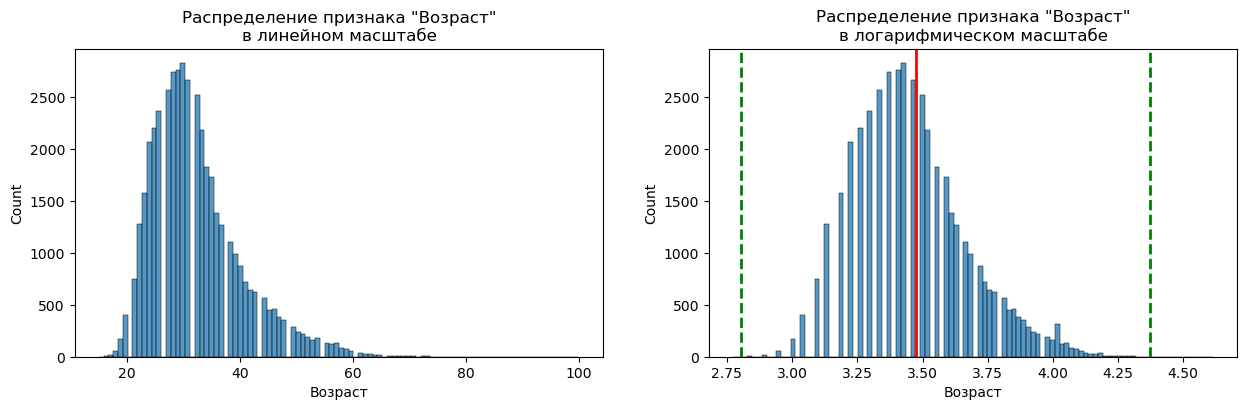

In [161]:
# используем функцию для трех сигм из лекции
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()   # математическое ожидание (среднее)
    sigma = x.std() # стандартное отклонение
    lower_bound = mu - 3 * sigma # нижняя граница
    upper_bound = mu + 4 * sigma # верхняя граница, тут сделали послабление взяли 4 сигмы
    outliers = data[(x < lower_bound) | (x > upper_bound)] # количество выбросов
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]# очищенный df
    return outliers, cleaned

# Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем размерности результатов:

outliers, cleaned = outliers_z_score(df, 'Возраст', log_scale=True)

print('===================================== ЦИФРЫ =====================================')
print(f'\nЧисло выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Число записей в наборе данных, ощиченных от выбросов: {cleaned.shape[0]}')
print(f'Значения выбросов: {outliers['Возраст'].unique()}')

# =====================================================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(df['Возраст'], bins=100, ax=axes[0])
histplot.set_title('Распределение признака "Возраст"\nв линейном масштабе');

#гистограмма в логарифмическом масштабе
log_age= np.log(df['Возраст']+1) # хотя тут нет нулевых значений
histplot = sns.histplot(log_age, bins=100, ax=axes[1])
histplot.axvline(log_age.mean(), color='r', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='g', ls='--', lw=2)
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='g', ls='--', lw=2)
histplot.set_title('Распределение признака "Возраст"\nв логарифмическом масштабе');

# показатель лог асимметрии, тут получается правосторонняя, почему-то...
print(f'\nПоказатель асимметрии: {log_age.skew()} , то есть асимметрия правосторонняя\n')
print('===================================== ГРАФИКИ =====================================')

**Выводы:**
1. Логарифмическое распределение ассиметрично в правую сторону, об этом говорит положительный показатель асимметрии, а также то, что линия следнего значения (сплошная красная линия) находится правее моды;
2. В категорию выбросов попали значения 15 и 100 лет (15 лет встречаются два раза), причем ранее минимальное значение возраста было 14 лет (коробчатая диаграмма), видимо строка с этим возрастам сократилась в рамках борьбы с грязными строками;
3. Значение возраста 100 лет, конечно, может быть, но крайне маловероятно по биологическим причинам, а вот значение возраста 15 лет вполне имеет право на существование. В тоже время мы помним, что очистили данные от пустых значений, и например, "минимальное" значение признака "Образование" у нас может быть "среднее", однако в пятнадцатилетнем возрасте не может быть такого образования, поэтому эти два значения все-таки, скорее всего, ошибочны.

***